In [8]:
import cv2
import os
import matplotlib.pyplot as plt
import math
import time
import mediapipe as mp
import numpy as np
import Utils as utils

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
# path = 'C://Users//juan.guevara01//Documents//Tesis//Videos//VideosInstitutoCreSer//Lsec_001'
# path_test = 'Videos//FrameTrain'

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, 
#                             results.pose_landmarks, 
#                             mp_holistic.POSE_CONNECTIONS) # Draw pose connections

    mp_drawing.draw_landmarks(image, 
                              results.right_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, 
                              results.left_hand_landmarks, 
                              mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(234,23,10), thickness=1, circle_radius=1))
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks.landmark else np.zeros(132)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh,rh])

In [65]:
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
    ) as holistic:
    img_video_count = 0
    for video in utils.sorted_alphanumeric(os.listdir('../../../Videos/VideosLSECv1/Testing/Lsec_01/')):
        cap = cv2.VideoCapture('../../../Videos/VideosLSECv1/Testing/Lsec_01/'+video)
        while(cap.isOpened()):
            frameId = cap.get(1)
            ret, frame = cap.read()
            current_points = 0
            if (ret != True):
                break
            if(not frame.shape == (360, 480, 3)):
                frame = cv2.resize(frame, (480,360))
            image, results = utils.mediapipe_detection(frame, holistic)
            rh_keypoints_x, rh_keypoints_y, lh_keypoints_x, lh_keypoints_y = utils.extract_keypoints_V3(results)
            if(rh_keypoints_x and rh_keypoints_y):
                x_min, x_max, y_min, y_max = utils.find_max_min(rh_keypoints_x,rh_keypoints_y)
                if(210 < x_max < 290 and 220 < y_min < 310 and 290 < y_max < 380):
                    current_points += 1
            if(lh_keypoints_x and lh_keypoints_y):
                x_min, x_max, y_min, y_max = utils.find_max_min(lh_keypoints_x,lh_keypoints_y)
                if(210 < x_min < 290 and 220 < y_min < 310 and 290 < y_max < 380):
                    current_points += 1

            if(current_points == 2):
                cv2.imwrite('../../../Videos/Pruebas/Frase1/'+str(img_video_count)+'.jpg', frame)
                img_video_count += 1

In [52]:
img = cv2.imread('../../../Videos/Pruebas/Frase1/0.jpg')

In [53]:
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
    ) as holistic:
        imageR, results = mediapipe_detection(img, holistic)

        draw_styled_landmarks(imageR, results)

        keypoints = extract_keypoints(results)

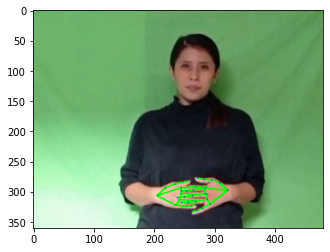

In [54]:
plt.imshow(cv2.cvtColor(imageR, cv2.COLOR_BGR2RGB))

In [46]:
def make_landmark_list(landmark_list):
    x_landmarks = []
    y_landmarks = []
    for landmark in landmark_list:
        x_landmarks.append(landmark.x)
        y_landmarks.append(landmark.y)
    return int(min(x_landmarks)*480-5), int(max(x_landmarks)*480+5), int(min(y_landmarks)*360-5), int(max(y_landmarks)*360+5)

In [47]:
xr_1, xr_2, yr_1, yr_2 = make_landmark_list(results.right_hand_landmarks.landmark)
print(xr_2, xr_2, yr_1, yr_2)

262 262 252 306


In [48]:
xl_1, xl_2, yl_1, yl_2 = make_landmark_list(results.left_hand_landmarks.landmark)
print(xl_2, xl_2, yl_1, yl_2)

261 261 245 305


In [33]:
x_min = int(min(x_l_landmarks)*480-5)
x_max = int(max(x_l_landmarks)*480+5)
y_min = int(min(y_l_landmarks)*360-5)
y_max = int(max(y_l_landmarks)*360)

print(x_min, x_max, y_min, y_max)

239 304 286 326


In [20]:
bounding_box = cv2.rectangle(img, (xr_1,yr_1 ), (xr_2, yr_2), (255, 0, 0), 2)

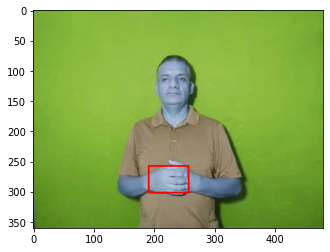

In [21]:
plt.imshow(bounding_box)

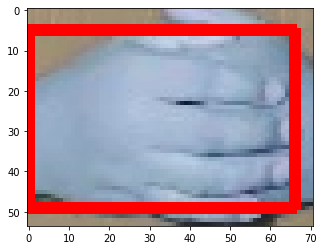

In [25]:
plt.imshow(img[yr_1-5:yr_2+5 , xr_1:xr_2+5])

In [34]:
image_resized = np.array(cv2.resize(img[y_min:y_max , x_min:x_max], (50,50), cv2.INTER_AREA))

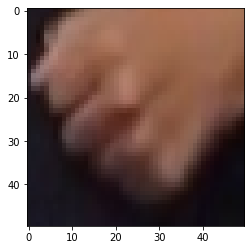

In [35]:
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))

In [54]:
np.save('1',image_resized)